In [ ]:
#Mouting drive for getting access to MyDrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Importing the required libraries.

In [ ]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from sklearn import metrics

##Loading original data file for processing 

In [ ]:
#reading the Pokemon.csv file
df = pd.read_csv('drive/My Drive/Colab Notebooks/CMPE_255_Project/Chicago_Crime/Crimes_-_2001_to_Present.csv')

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
df.shape

(7311030, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311030 entries, 0 to 7311029
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
df.isnull().sum().sum()

1597240

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0)

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8190
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614835
Community Area          613484
FBI Code                     0
X Coordinate             72136
Y Coordinate             72136
Year                         0
Updated On                   0
Latitude                 72136
Longitude                72136
Location                 72136
dtype: int64

In [ ]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna()

In [ ]:
# Remove irrelevant/not meaningful attributes
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df = df.drop(['Location'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   IUCR                  object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   Beat                  int64  
 9   District              float64
 10  Ward                  float64
 11  Community Area        float64
 12  FBI Code              object 
 13  X Coordinate          float64
 14  Y Coordinate          float64
 15  Year                  int64  
 16  Latitude              float64
 17  Longitude             float64
dtypes: bool(2), float64(7), int64(2), object(7)
memory usage: 872.1+ MB


In [ ]:
# Splitting the Date to Day_num, Month, Year, Hour(Time), Minute, day_of_week

df['date'] = pd.to_datetime(df['Date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day_num'] = df['date'].dt.day
df['Time'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
df = df.drop(['Date'], axis=1) 
df = df.drop(['date'], axis=1) 
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,9,5,13,Saturday
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.765400,9,4,11,Friday
3,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,9,5,12,Saturday
4,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,9,5,13,Saturday
5,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,9,5,10,Saturday


In [ ]:
df.shape

(6626783, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Month                 int64  
 18  Day_num               int64  
 19  Time                  int64  
 20  day_of_week           object 
dtypes: bool(2), float64(7), int64(5), object(7)
memory usage: 1023.8+ MB


In [ ]:
n = len(pd.unique(df['Primary Type']))
print ("Unique Values of Primary Type: " , n)

Unique Values of Primary Type:  35


##We have total 35 unque values for primary type (crime type).

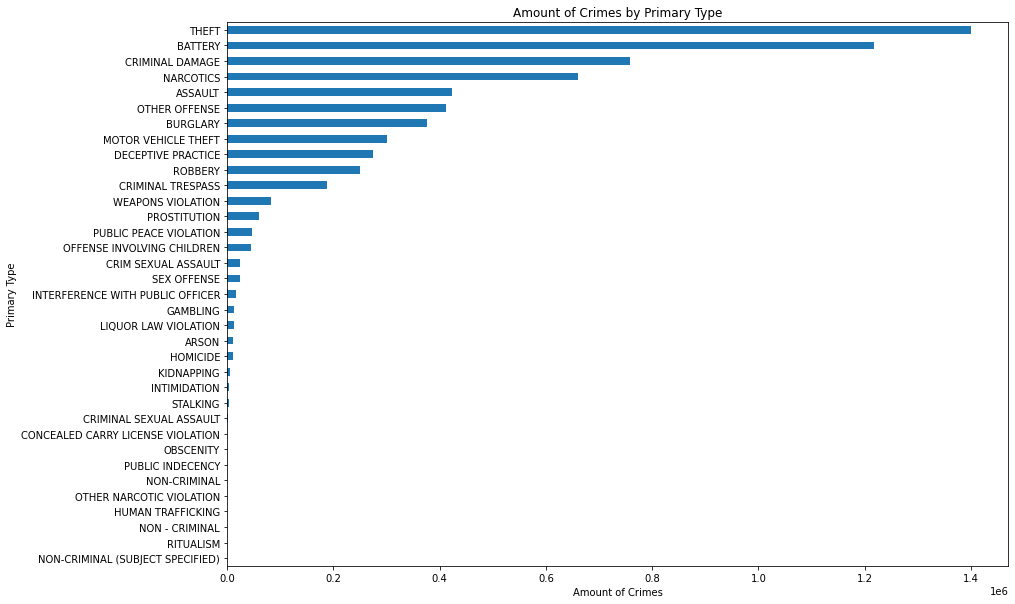

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

##Mapping primary type to the total of 8 unique values for crime type for fast processing.

In [ ]:
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
df['primary_type_grouped'] = df['Primary Type'].map(primary_type_mapping)

##Also mapping Block variable to final 4 unique values for ease of processing.

In [ ]:
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
df['zone'] = df.Block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Month                 int64  
 18  Day_num               int64  
 19  Time                  int64  
 20  day_of_week           object 
 21  primary_type_grouped  object 
 22  zone                  object 
dtypes: bool

##To get the counts for each crime type and to anlayze it.

In [ ]:
df['Count_CrimeType_Column'] = df['primary_type_grouped'].map(df['primary_type_grouped'].value_counts())

In [ ]:
df.head(5)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
3,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
4,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
5,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0


In [ ]:
df['primary_type_grouped'].unique()

array(['NON-CRIMINAL_ASSAULT', 'THEFT', 'NARCOTIC_OFFENSE',
       'OTHER_OFFENSE', 'CRIMINAL_OFFENSE', 'WEAPONS_OFFENSE',
       'SEXUAL_OFFENSE', 'HUMAN_TRAFFICKING_OFFENSE', nan], dtype=object)

In [ ]:
df.drop('Primary Type', inplace=True, axis=1)
df.drop('Block', inplace=True, axis=1)
df.drop('X Coordinate', inplace=True, axis=1)
df.drop('Y Coordinate', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   IUCR                    object 
 1   Description             object 
 2   Location Description    object 
 3   Arrest                  bool   
 4   Domestic                bool   
 5   Beat                    int64  
 6   District                float64
 7   Ward                    float64
 8   Community Area          float64
 9   FBI Code                object 
 10  Year                    int64  
 11  Latitude                float64
 12  Longitude               float64
 13  Month                   int64  
 14  Day_num                 int64  
 15  Time                    int64  
 16  day_of_week             object 
 17  primary_type_grouped    object 
 18  zone                    object 
 19  Count_CrimeType_Column  float64
dtypes: bool(2), float64(6), int64(5), object(7)
memory usage: 973.2+ MB


In [ ]:
all_crime_type = df[['primary_type_grouped','Count_CrimeType_Column']].copy()

In [ ]:
all_crime_type.head()

,primary_type_grouped,Count_CrimeType_Column
0,NON-CRIMINAL_ASSAULT,1640154.0
1,THEFT,2327482.0
3,NARCOTIC_OFFENSE,661033.0
4,NON-CRIMINAL_ASSAULT,1640154.0
5,THEFT,2327482.0


In [ ]:
all_crime_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 2 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   primary_type_grouped    object 
 1   Count_CrimeType_Column  float64
dtypes: float64(1), object(1)
memory usage: 151.7+ MB


In [ ]:
all_crime_type.shape

(6626783, 2)

In [ ]:
all_crime_type.sort_values(['Count_CrimeType_Column'],ascending=[False])

,primary_type_grouped,Count_CrimeType_Column
2186108,THEFT,2327482.0
2243514,THEFT,2327482.0
2243498,THEFT,2327482.0
4290986,THEFT,2327482.0
2243500,THEFT,2327482.0
...,...,...
7310671,NaN,NaN
7310759,NaN,NaN
7310762,NaN,NaN
7310840,NaN,NaN


In [ ]:
# dropping ALL duplicte values
final_crime_type_counts= all_crime_type.drop_duplicates()

In [ ]:
final_crime_type_counts.shape

(9, 2)

In [ ]:
final_crime_type_counts= final_crime_type_counts.sort_values(['Count_CrimeType_Column'],ascending=[False])

In [ ]:
final_crime_type_counts = final_crime_type_counts.dropna()

In [ ]:
final_crime_type_counts.reset_index(drop=True, inplace =True)

##We can see from below code that the crime type are arranged in descending order according to the crime type count.

In [ ]:
final_crime_type_counts

,primary_type_grouped,Count_CrimeType_Column
0,THEFT,2327482.0
1,NON-CRIMINAL_ASSAULT,1640154.0
2,CRIMINAL_OFFENSE,1230761.0
3,NARCOTIC_OFFENSE,661033.0
4,OTHER_OFFENSE,517088.0
5,SEXUAL_OFFENSE,112895.0
6,WEAPONS_OFFENSE,83250.0
7,HUMAN_TRAFFICKING_OFFENSE,51446.0


In [ ]:
df.dropna(how='all')

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,0870,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
4,0560,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
5,0610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311025,1130,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,431,4.0,7.0,51.0,11,2021,41.710890,-87.568176,3,1,0,Monday,CRIMINAL_OFFENSE,South,1230761.0
7311026,1582,CHILD PORNOGRAPHY,RESIDENCE,False,False,1814,18.0,43.0,7.0,17,2021,41.924251,-87.638070,1,2,9,Saturday,HUMAN_TRAFFICKING_OFFENSE,North,51446.0
7311027,1750,CHILD ABUSE,APARTMENT,False,True,2535,25.0,37.0,23.0,08B,2021,41.902680,-87.725422,4,14,0,Wednesday,HUMAN_TRAFFICKING_OFFENSE,West,51446.0
7311028,0530,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,True,False,1824,18.0,2.0,8.0,04A,2021,41.903497,-87.629975,4,14,19,Wednesday,NON-CRIMINAL_ASSAULT,North,1640154.0


In [ ]:
df.shape

(6626783, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   IUCR                    object 
 1   Description             object 
 2   Location Description    object 
 3   Arrest                  bool   
 4   Domestic                bool   
 5   Beat                    int64  
 6   District                float64
 7   Ward                    float64
 8   Community Area          float64
 9   FBI Code                object 
 10  Year                    int64  
 11  Latitude                float64
 12  Longitude               float64
 13  Month                   int64  
 14  Day_num                 int64  
 15  Time                    int64  
 16  day_of_week             object 
 17  primary_type_grouped    object 
 18  zone                    object 
 19  Count_CrimeType_Column  float64
dtypes: bool(2), float64(6), int64(5), object(7)
memory usage: 973.2+ MB


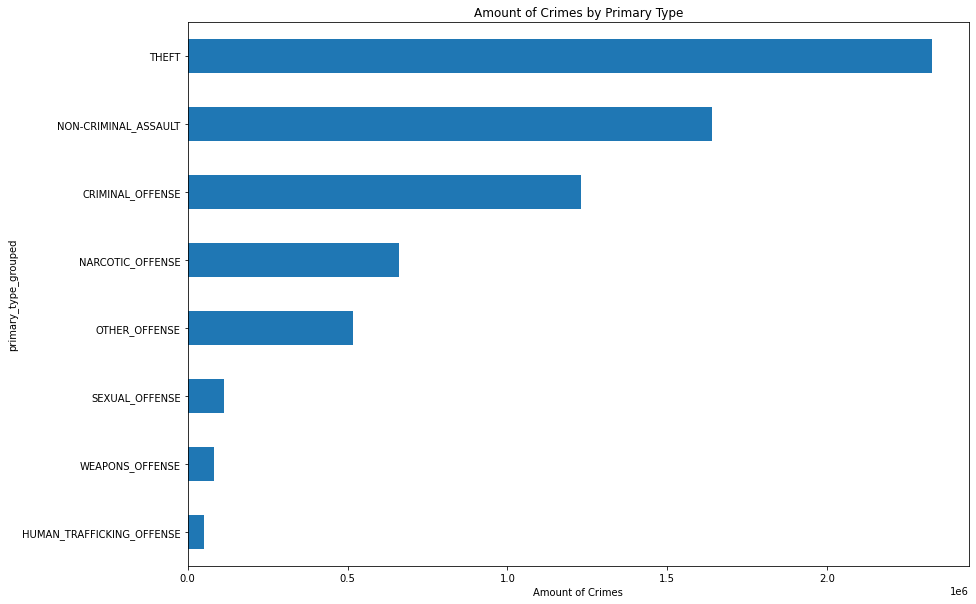

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['primary_type_grouped']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

## To check how many unique values we have for different variables , which will be used in classification models.

In [ ]:
n = len(pd.unique(df['Description']))
print ("Unique Values of Description: " , n)

Unique Values of Description:  533


In [ ]:
n = len(pd.unique(df['Year']))
print ("Unique Values of Year: " , n)

Unique Values of Year:  21


In [ ]:
n = len(pd.unique(df['District']))
print ("Unique Values of District: " , n)

Unique Values of District:  24


In [ ]:
n = len(pd.unique(df['Ward']))
print ("Unique Values of Ward: " , n)

Unique Values of Ward:  50


In [ ]:
n = len(pd.unique(df['Beat']))
print ("Unique Values of Beat: " , n)

Unique Values of Beat:  303


In [ ]:
n = len(pd.unique(df['Community Area']))
print ("Unique Values of Community Area: " , n)

Unique Values of Community Area:  78


In [ ]:
n = len(pd.unique(df['Location Description']))
print ("Unique Values of Location Description: " , n)

Unique Values of Location Description:  214


In [ ]:
n = len(pd.unique(df['Arrest']))
print ("Unique Values of Arrest: " , n)

Unique Values of Arrest:  2


In [ ]:
n = len(pd.unique(df['Domestic']))
print ("Unique Values of Domestic: " , n)

Unique Values of Domestic:  2


In [ ]:
n = len(pd.unique(df['Latitude']))
print ("Unique Values of Latitude: " , n)

Unique Values of Latitude:  658272


In [ ]:
n = len(pd.unique(df['Longitude']))
print ("Unique Values of Longitude: " , n)

Unique Values of Longitude:  657903


In [ ]:
n = len(pd.unique(df['Time']))
print ("Unique Values of Time: " , n)

Unique Values of Time:  24


In [ ]:
n = len(pd.unique(df['IUCR']))
print ("Unique Values of IUCR: " , n)

Unique Values of IUCR:  400


In [ ]:
n = len(pd.unique(df['FBI Code']))
print ("Unique Values of FBI Code: " , n)

Unique Values of FBI Code:  26


##To save the processed data file in the drive so it can be futher used for bulding different classification model and also for clustering purposes.

In [ ]:
import os
print(os.listdir(r"drive/My Drive/Colab Notebooks/CMPE_255_Project"))

['Chicago_Crime']


In [ ]:
# storing pandas dataframe as a picklefile for later use ...(Merged dataset for three files review, user, business)
os.path.isfile("drive/My Drive/Colab Notebooks/CMPE_255_Project/Chicago_Crime_Processed_Data.pkl")
df.to_pickle("drive/My Drive/Colab Notebooks/CMPE_255_Project/Chicago_Crime_Processed_Data.pkl")
